In [1]:
from basicpy import BaSiC
from matplotlib import pyplot as plt
import numpy as np
import zarr

In [2]:
path      = '/u/home/f/f7xiesnm/project-zipursky/data/hold/lt172/r1_export.n5'

In [3]:
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
images = zarr_data[f'/c0/s4'][...]
images.shape

(187, 227, 228)

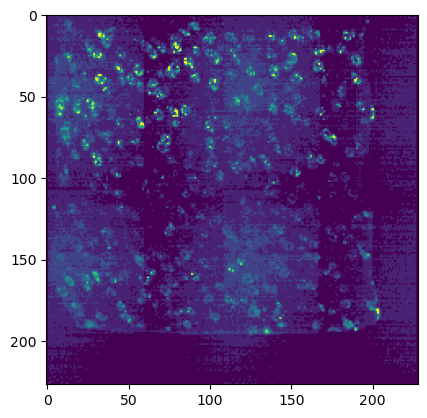

In [22]:
# images = bdata.wsi_brain()
plt.imshow(images[50], vmin=90, vmax=100)

In [5]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

CPU times: user 35.9 s, sys: 4.76 s, total: 40.6 s
Wall time: 18.6 s


In [6]:
%%time
images_transformed = basic.transform(images)

CPU times: user 29 ms, sys: 60.1 ms, total: 89.1 ms
Wall time: 86.8 ms


In [7]:
images.shape, images_transformed.shape

((187, 227, 228), (187, 227, 228))

In [8]:
basic.flatfield.shape, basic.darkfield.shape

((227, 228), (227, 228))

In [9]:
F = basic.flatfield
D = basic.darkfield

In [10]:
T = images_transformed 
O = images

In [11]:
i = 12
np.all(D+T[i]*F-O[i] < 1e-3)

True

In [12]:
np.all(D+T*F-O < 1e-2)

True

In [13]:
T.shape, F.shape

((187, 227, 228), (227, 228))

In [14]:
np.all(T - (O-D)/F < 1e-2)

True

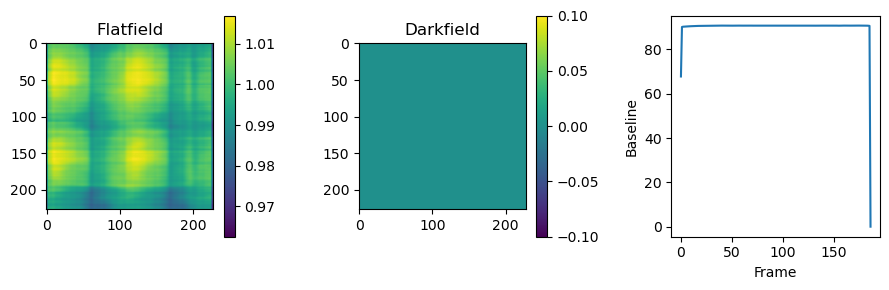

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

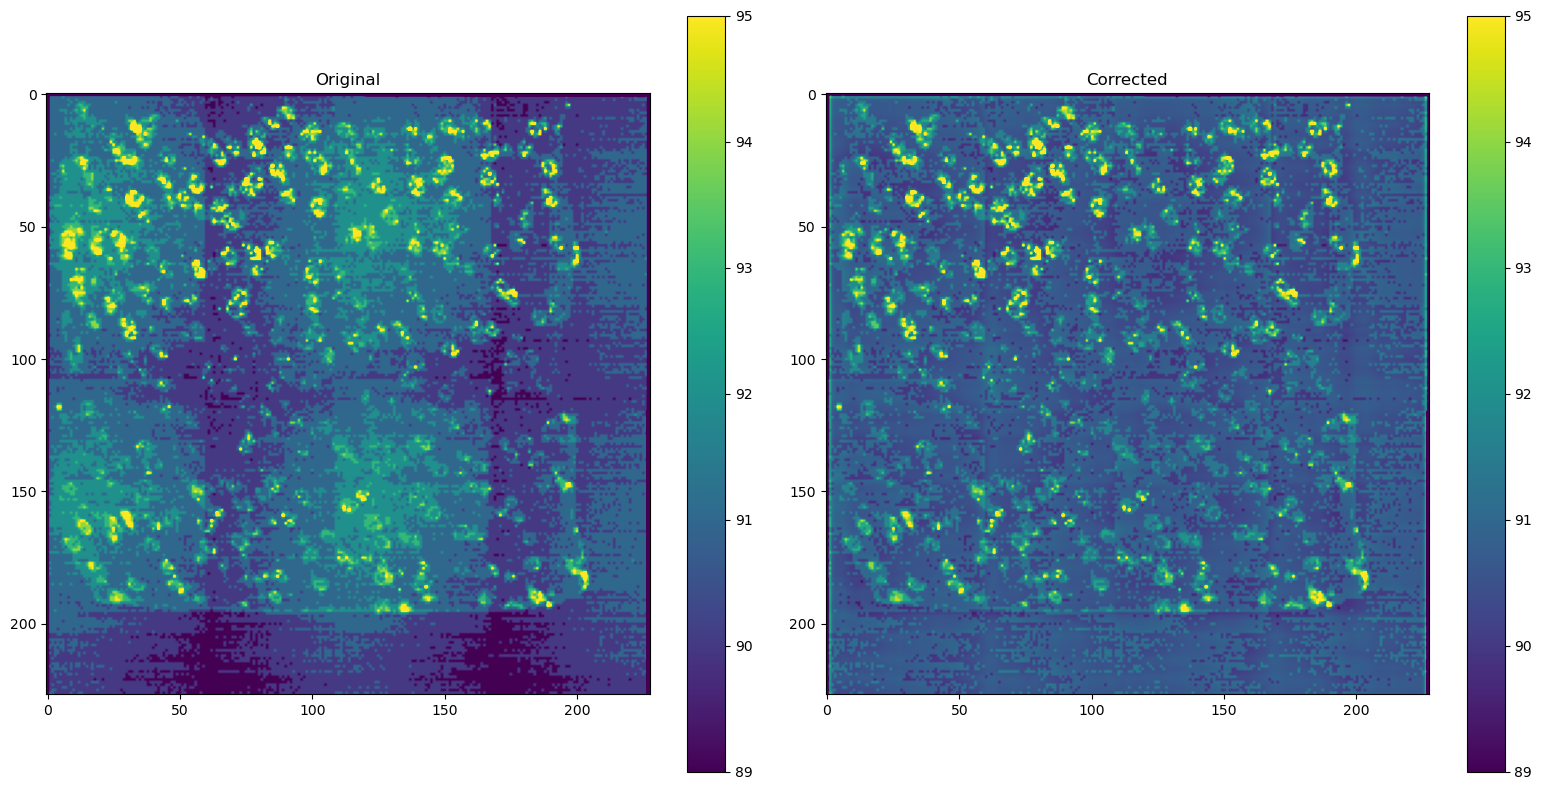

In [25]:
i = 50
vmin = np.percentile(images[i], 5)
vmax = np.percentile(images[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()